In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ecusa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### MNISTデータのインポート

In [2]:
from keras.datasets import mnist
(x_train, Y_train), (X_test, y_test) = mnist.load_data()
X_train = x_train[:50000]
X_val = x_train[50000:]
y_train = Y_train[:50000]
y_val = Y_train[50000:]
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_val shape: ',X_val.shape)
print('y_val shape: ',y_val.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (50000, 28, 28)
y_train shape:  (50000,)
X_val shape:  (10000, 28, 28)
y_val shape:  (10000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### 画像表示

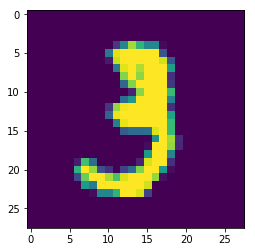

In [3]:
idx = 10
img = np.array(X_train[idx], dtype=np.uint8)
plt.imshow(img)

### データ加工

In [4]:
#(1)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test  = X_test.astype('float32')

#正規化
#正則化で0－1に収めることによってパラメータの更新幅が小さくなるので学習が比較的早く進むから
#0-255を0-1の間に収める
#(2)
X_train /= 255
X_val /= 255
X_test /= 255


#inputデータを1次元配列に直す
# 28×28の2次元配列 ⇒ 784×1の1次元配列に
#ネットワークに入力できる形に
#(3)
X_train_1d = X_train.reshape(-1, 784)
X_val_1d = X_val.reshape(-1, 784)
X_test_1d = X_test.reshape(-1, 784)

print('X_train shape: ',X_train_1d.shape)
print('X_val shape: ', X_val_1d.shape)
print('X_test shape: ',X_test_1d.shape)

X_train shape:  (50000, 784)
X_val shape:  (10000, 784)
X_test shape:  (10000, 784)


In [5]:
#正解データを2値クラスデータに変換
#整数のクラスベクトルから2値クラスの行列に変換
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape: ',y_train.shape)
print('y_val shape: ', y_val.shape)
print('y_test shape: ', y_test.shape)

y_train shape:  (50000, 10)
y_val shape:  (10000, 10)
y_test shape:  (10000, 10)


### モデルの作成

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation

def build_model(input_shape):
    model = Sequential()
    model.add(Dense(units=512, activation='relu', input_dim=input_shape))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
    
    return model

`loss`:損失関数⇒これを最小化するように学習 

`optimizer`:最適化アルゴリズム⇒これに従ってパラメータの更新 

`metrics`:評価関数⇒評価結果の値が訓練に直接使われることはありません．

In [7]:
model = build_model(X_train_1d.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train_1d,y_train, epochs=5, batch_size=32,validation_data=(X_val_1d,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 43s 857us/step - loss: 0.2079 - acc: 0.9366 - val_loss: 0.1193 - val_acc: 0.9684
Epoch 2/5
50000/50000 [==============================] - 40s 794us/step - loss: 0.1053 - acc: 0.9715 - val_loss: 0.1143 - val_acc: 0.9717
Epoch 3/5
50000/50000 [==============================] - 45s 895us/step - loss: 0.0826 - acc: 0.9792 - val_loss: 0.1682 - val_acc: 0.9680
Epoch 4/5
50000/50000 [==============================] - 44s 886us/step - loss: 0.0733 - acc: 0.9834 - val_loss: 0.1654 - val_acc: 0.9716
Epoch 5/5
50000/50000 [==============================] - 43s 868us/step - loss: 0.0636 - acc: 0.9861 - val_loss: 0.1276 - val_acc: 0.9766


In [9]:
def draw_graph(history):
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(16,8))

    acc = history.history['acc'] #学習用データの正解率
    val_acc = history.history['val_acc'] #検証用データの正解率
    loss = history.history['loss'] #学習用データの損失値
    val_loss = history.history['val_loss'] #検証用データの損失値
    
    axL.plot(acc,label='Training acc')
    axL.plot(val_acc,label='Validation acc')
    axL.set_title('Accuracy')
    axL.legend(loc='best')

    axR.plot(loss,label='Training loss')
    axR.plot(val_loss,label='Validation loss')
    axR.set_title('Loss')
    axR.legend(loc='best')

    plt.show()

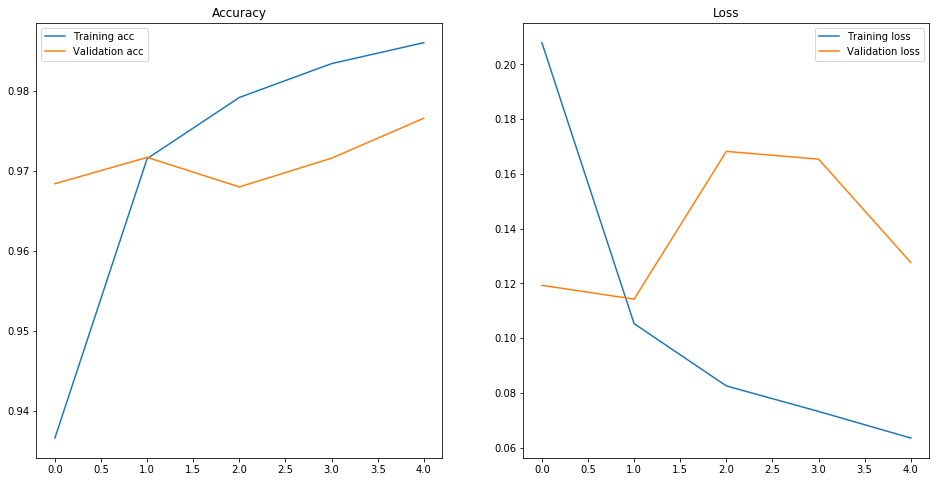

In [10]:
draw_graph(history)

少し過学習気味です。

In [11]:
#テストデータでの評価
score = model.evaluate(X_test_1d, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12025695346433299
Test accuracy: 0.978


In [12]:
# 間違った画像のインデックスを格納。
def get_wrong_idx(X,y,predict):
    wrong_idx = []
    for i,v in enumerate(predict):
        pre_ans = v.argmax()
        ans = y[i].argmax()
        dat = X[i]*255
        if ans == pre_ans: 
            continue
        wrong_idx.append(i)
    return wrong_idx

#間違った画像の表示
def draw_wrong_img(X,y,predict):
    pre_num = np.argmax(predict, axis=1)
    plt.figure(figsize=(20,20))
    for i in range(9):
        idx = wrong_idx[i]
        dat = X[idx]*255
        img = np.array(dat.reshape(28,-1), dtype = np.uint8)
        plt.subplot(3,3,i+1)
        plt.title('ans: '+str(y[idx].argmax())+
                  ', pre: '+str(pre_num[idx]),fontsize=20)
        plt.imshow(img)

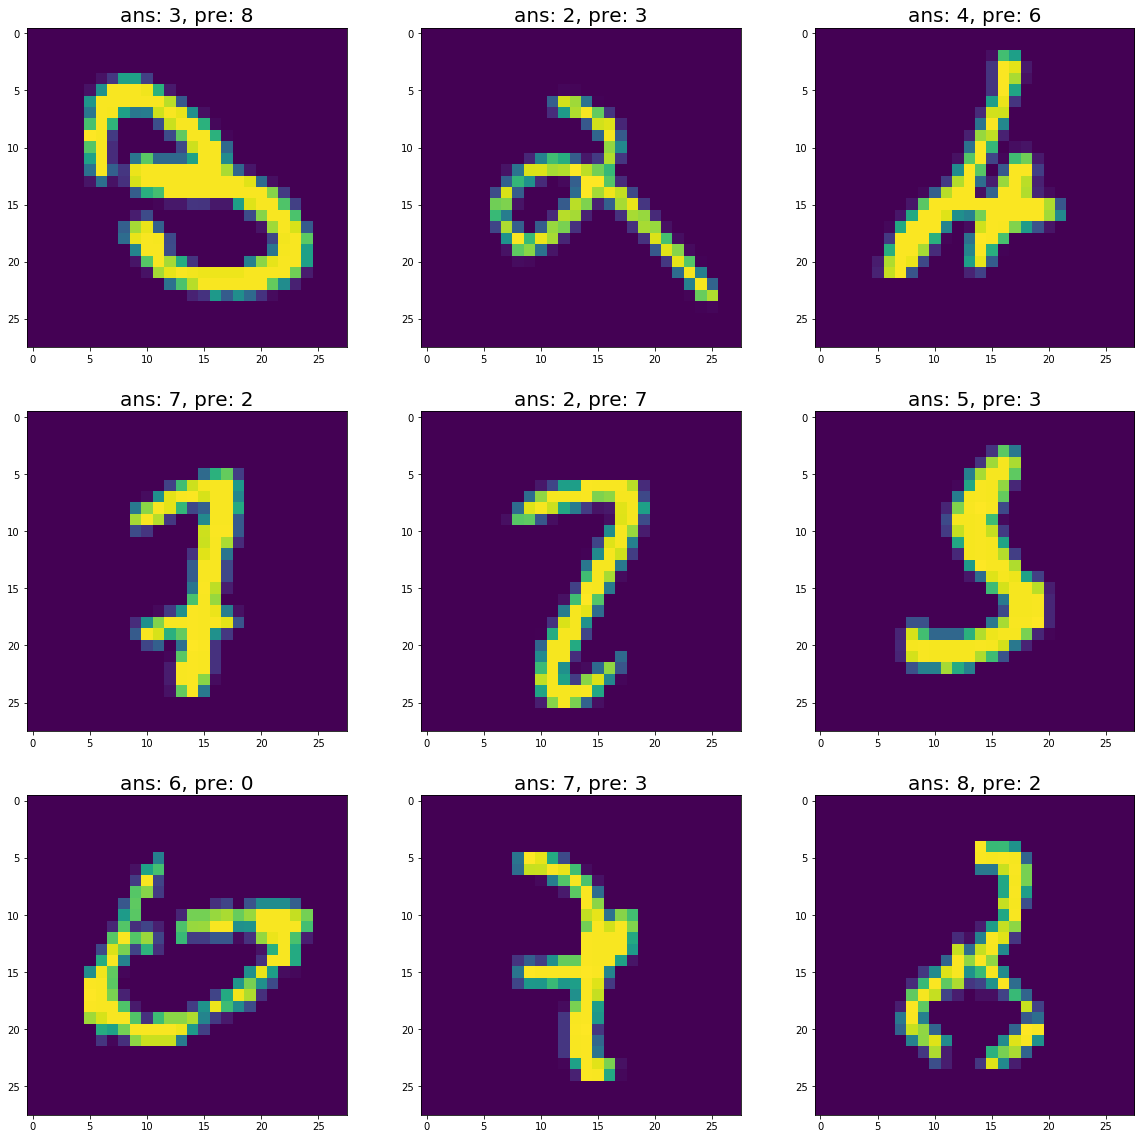

In [13]:
pre = model.predict(X_test_1d)

wrong_idx = get_wrong_idx(X_test_1d,y_test,pre)
draw_wrong_img(X_test_1d, y_test,pre)

### Dropout層を追加して過学習を防ぐ

In [14]:
from keras.layers import Dropout

def build_model2(input_shape):
    model = Sequential()
    model.add(Dense(units=512, activation='relu', input_dim=input_shape))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
    
    return model

In [15]:
model = build_model2(X_train_1d.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train_1d,y_train, epochs=5, batch_size=32,validation_data=(X_val_1d,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 50s 995us/step - loss: 0.2556 - acc: 0.9248 - val_loss: 0.1245 - val_acc: 0.9655
Epoch 2/5
50000/50000 [==============================] - 47s 945us/step - loss: 0.1456 - acc: 0.9615 - val_loss: 0.1075 - val_acc: 0.9747
Epoch 3/5
50000/50000 [==============================] - 49s 987us/step - loss: 0.1327 - acc: 0.9684 - val_loss: 0.1215 - val_acc: 0.9729
Epoch 4/5
50000/50000 [==============================] - 58s 1ms/step - loss: 0.1268 - acc: 0.9726 - val_loss: 0.1089 - val_acc: 0.9789 - loss: 0.1
Epoch 5/5
50000/50000 [==============================] - 55s 1ms/step - loss: 0.1246 - acc: 0.9749 - val_loss: 0.1343 - val_acc: 0.9767


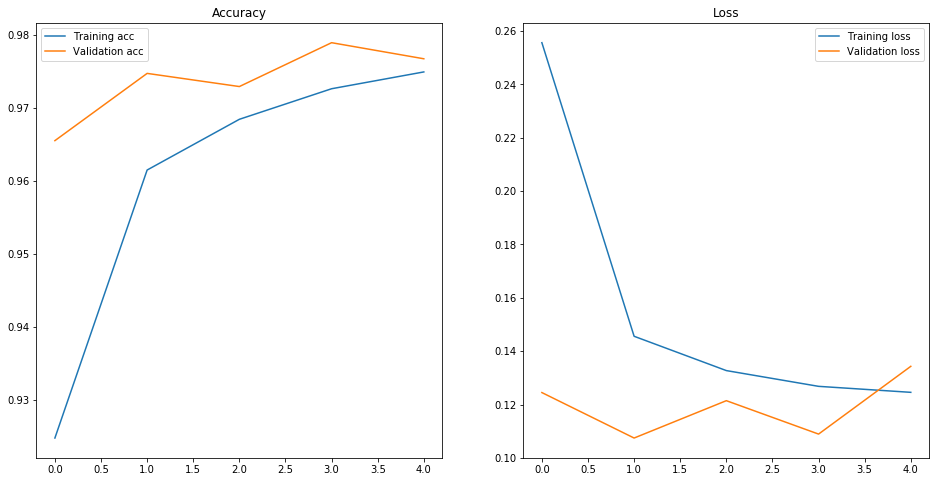

In [17]:
draw_graph(history)

In [18]:
#テストデータでの評価
score = model.evaluate(X_test_1d, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13784278037012312
Test accuracy: 0.9777


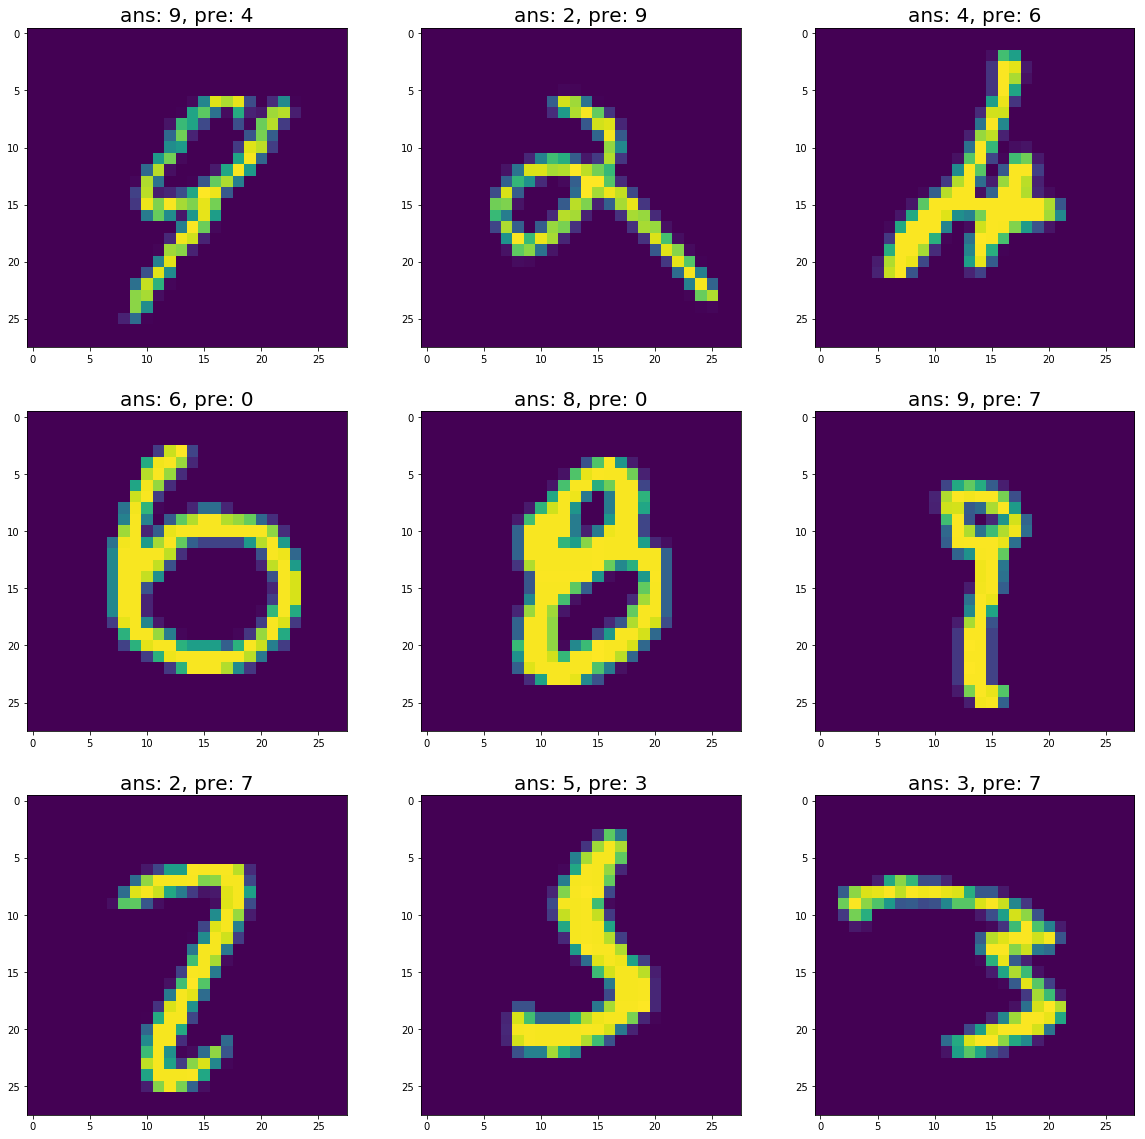

In [19]:
pre = model.predict(X_test_1d)

wrong_idx = get_wrong_idx(X_test_1d,y_test,pre)
draw_wrong_img(X_test_1d, y_test,pre)

### 畳み込みNNをためす

In [20]:
X_train_CNN = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val_CNN = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test_CNN = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train_CNN.shape)
print(X_val_CNN.shape)
print(X_test_CNN.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [288]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

def build_model3(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32,kernel_size=(3,3),padding='same',input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,kernel_size=(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.25))

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
    
    return model

In [295]:
model = build_model3(X_train_CNN.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
__________

In [296]:
history = model.fit(X_train_CNN,y_train, epochs=5, batch_size=32,validation_data=(X_val_CNN,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 896s 18ms/step - loss: 0.2188 - acc: 0.9336 - val_loss: 0.0596 - val_acc: 0.9822
Epoch 2/5
50000/50000 [==============================] - 827s 17ms/step - loss: 0.1113 - acc: 0.9678 - val_loss: 0.0610 - val_acc: 0.9818
Epoch 3/5
50000/50000 [==============================] - 865s 17ms/step - loss: 0.1149 - acc: 0.9688 - val_loss: 0.0799 - val_acc: 0.9810
Epoch 4/5
50000/50000 [==============================] - 872s 17ms/step - loss: 0.1223 - acc: 0.9674 - val_loss: 0.0809 - val_acc: 0.9824
Epoch 5/5
50000/50000 [==============================] - 866s 17ms/step - loss: 0.1295 - acc: 0.9662 - val_loss: 0.0666 - val_acc: 0.9833


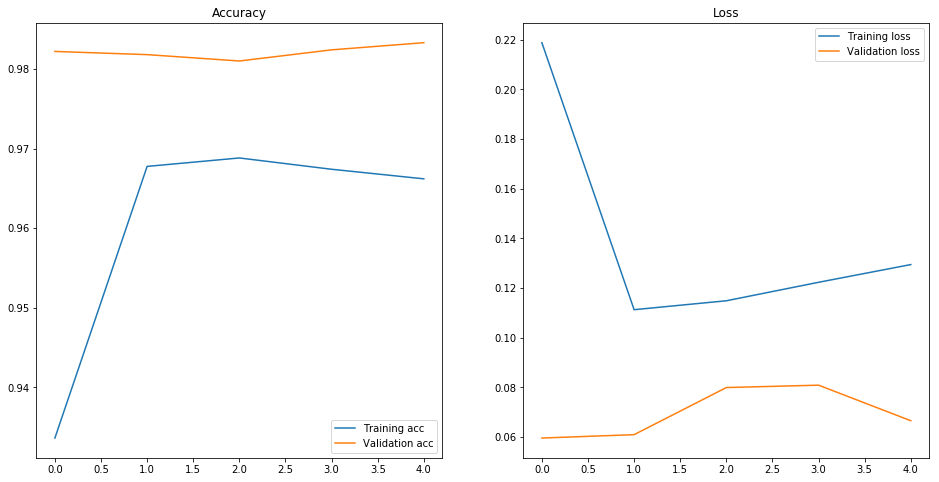

In [297]:
draw_graph(history)

In [299]:
#テストデータでの評価
score = model.evaluate(X_test_CNN, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05853876974989253
Test accuracy: 0.9812


In [303]:
pre = model.predict(X_test_CNN)

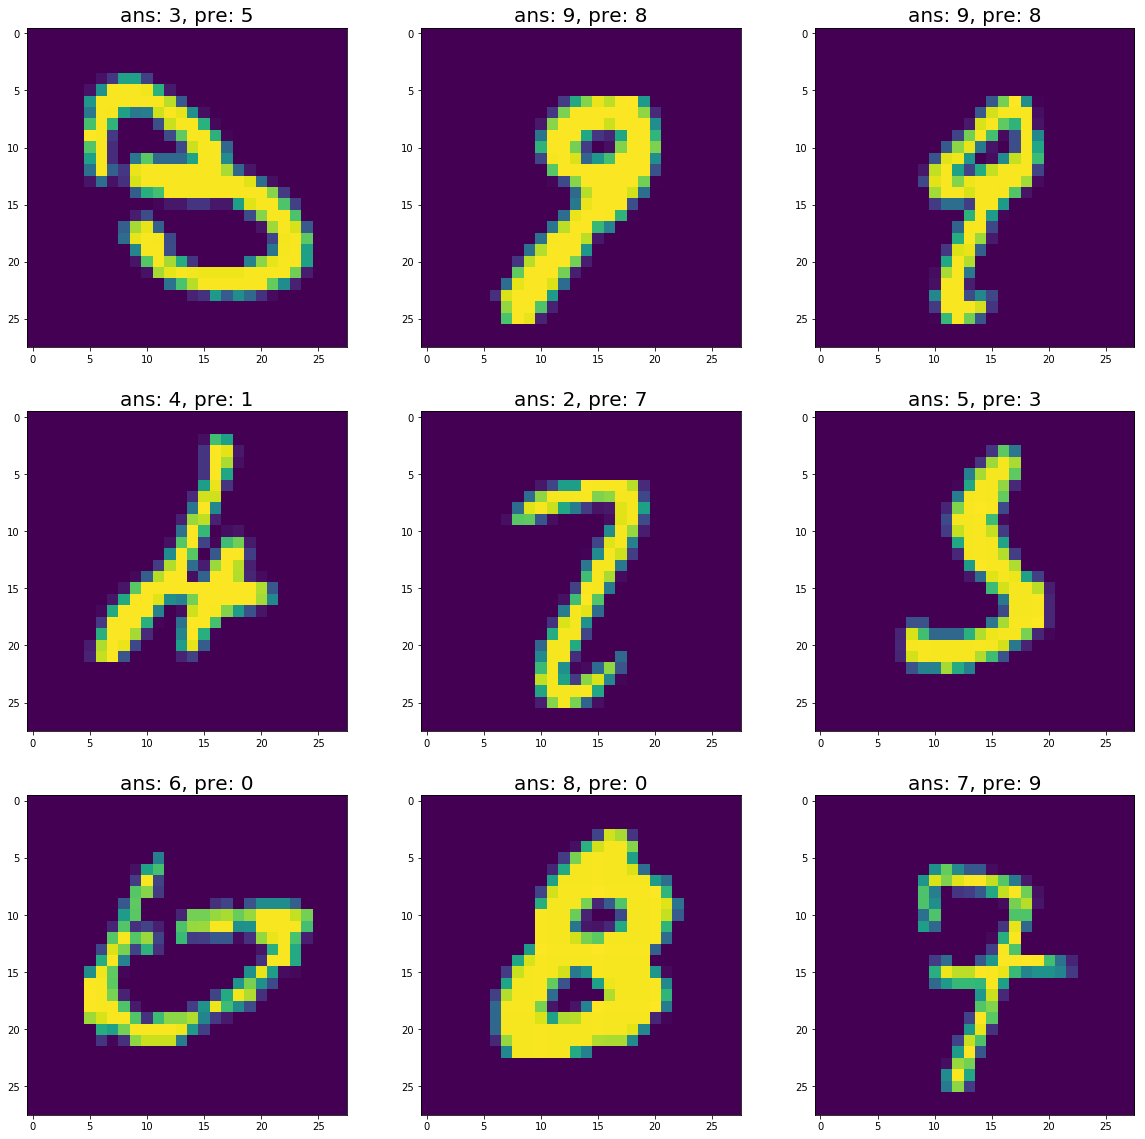

In [304]:
wrong_idx = get_wrong_idx(X_test_CNN,y_test,pre)
draw_wrong_img(X_test_CNN, y_test,pre)